# Supplementary Figure (Currently Extended data plot 3)
Todo: 
- change the geneset names for their 'more easy' names, for sure in the case of the non GSEA names
- change the heatmap colorRamp labels

In [2]:
wd = "/workspace/projects//immune_biomarkers/repo/immune_biomarkers/"
setwd(wd)

source(paste0(wd,"/mission_control/treasure_map.R"))
source(paste0(wd,"/mission_control/helpers/figures/exhaustive_plots.R"))
source(paste0(wd,"/mission_control/helpers/figures/exhaustive_settings.R"))
source(paste0(wd,"/mission_control/helpers/figures/themes.R"))

library(tidyverse)
suppressPackageStartupMessages(library(ComplexHeatmap))
library(ComplexHeatmap)
library(data.table)
library(circlize)
col_fun = colorRamp2(c(-0.2,1), hcl_palette = "YlGnBu", reverse = TRUE)

In [3]:
# load all the unique genesets used throughout the study (255 genesets)
genesets = fread("ref/Table_S2_255_genesets.csv")

In [4]:
ingredients <- readRDS(paste0(TMP_DIR,"exhaustive-plots-base.Rds"))  %>% 
    filter(grepl("gene_set", feature))  %>% 
    mutate(feature_no_extra = gsub("isofox_|gene_set_", "", feature))  %>% 
    mutate(simplename = gsub("mariathan_", "m_", tolower(feature_no_extra)))  %>% 
    filter(simplename %in% genesets$simplename)

labels <- readRDS(paste0(TMP_DIR,"exhaustive-plots-labels.Rds"))
ready <- readRDS(paste0(I_DIR, "cpi_go.Rds"))
threshold <- -log10(ingredients$by_05_fdr)[1]

In [5]:
setdiff(ingredients$simplename  %>% unique(), genesets$simplename) 
setdiff(genesets$simplename, ingredients$simplename  %>% unique()) 
intersect(genesets$simplename, ingredients$simplename  %>% unique())   %>% length()

character(0)

character(0)

[1] 255

In [6]:
# Read the interpretable geneset names
geneset_names = fread(paste0(REF_DIR, "CPI_genesets_namesonly.txt"))
colnames(geneset_names)[1] = "feature_no_extra"
geneset_names = geneset_names  %>% 
    mutate(feature_no_extra =  gsub("isofox_|mariathan_|gene_set_|battle_", "", feature_no_extra))

In [7]:
# merge ingredients with the geneset names 
ingredients = left_join(ingredients, geneset_names, by = "feature_no_extra")  %>% 
    filter(grepl("gene_set|HALLMARK|KEGG|mariathan_", feature))  %>% 
    mutate(featurename = gsub("isofox_|mariathan_|gene_set_", "", feature))
ingredients = ingredients  %>% filter(!is.na(Short_name))

In [8]:
# filter the ingredients for the desired test features
ingredients3 = ingredients  %>% 
    filter(model %in% "os" & dataset %in% "all" & covariates %in% "residuals")  %>% 
    filter(log10_p > threshold)
dim(ingredients3)

[1] 43 36

In [9]:
plot_signif_gene_heatmap = function(ingredients, model_sel, dataset_sel, covariates_sel) {
    
    ingredients3 = ingredients  %>% 
        filter(model %in% model_sel)  %>%
        filter(dataset %in% dataset_sel)  %>% 
        filter(covariates %in% covariates_sel)  %>% 
        filter(log10_p > threshold) 
        
    ingredients_signif = ingredients3  %>%
        select(feature, Short_name)  
       
    sig_mat = ready  %>% select(all_of(unique(ingredients_signif$feature)))
    colnames(sig_mat) = ingredients_signif$Short_name
    sig_mat = sig_mat[!is.na(sig_mat[,1])  %>% as.logical()]
    colnames(sig_mat) = gsub("isofox_gene_set_", "", colnames(sig_mat))
    
    cormat = cor(sig_mat)
    
    Heatmap(cormat, col = col_fun, 
           heatmap_legend_param = list(title = "correlation"))    

}

png 
  2

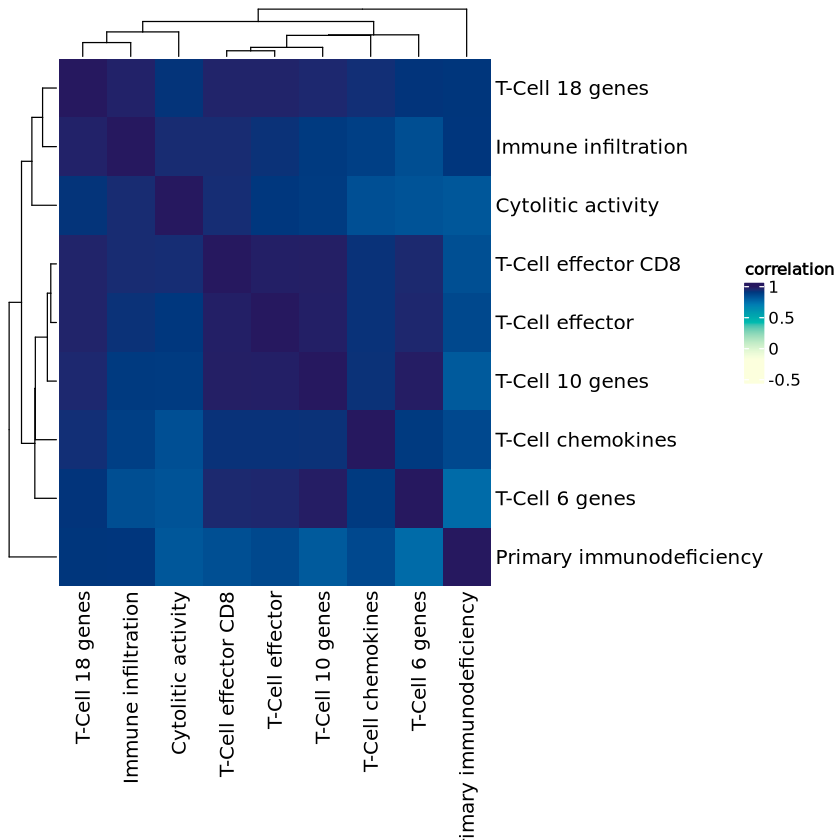

In [10]:
plot_3a = plot_signif_gene_heatmap(ingredients, model_sel = "bor", dataset_sel = "all", covariates_sel = "age_biopsy_purity_tissue")
plot_3a
pdf("../..//final_figures/3a_supplement_heatmap.pdf", width = 6, height = 5.5)
plot_3a
dev.off()

png 
  2

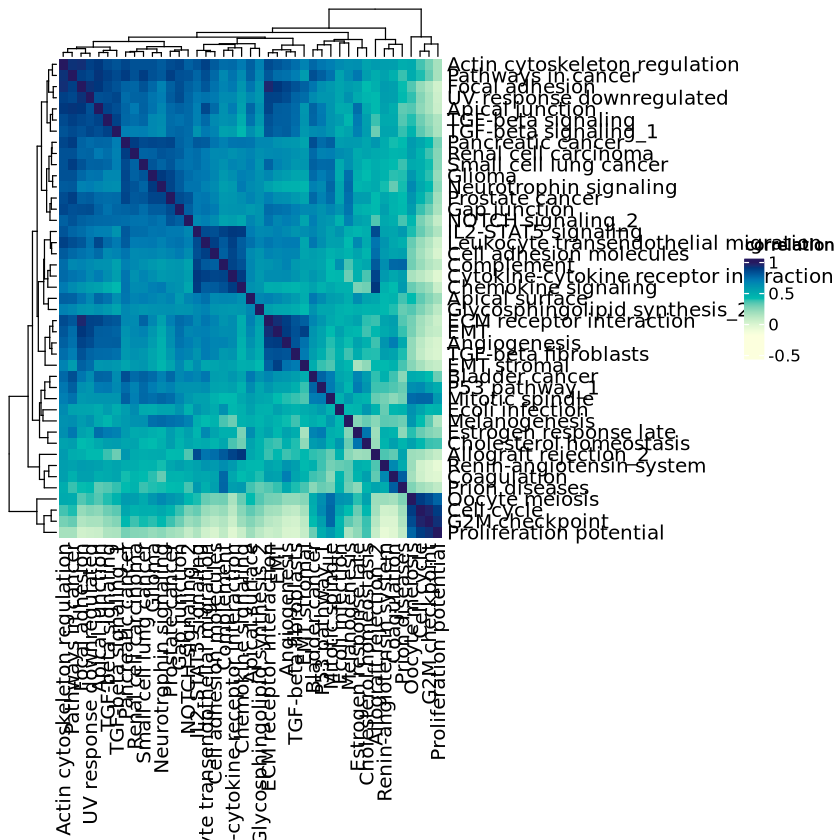

In [11]:
plot_3c = plot_signif_gene_heatmap(ingredients, model = "os", dataset = "all", covariates = "residuals")
plot_3c
pdf("../..//final_figures/3c_supplement_heatmap.pdf", width = 10, height = 10)
plot_3c
dev.off()

png 
  2

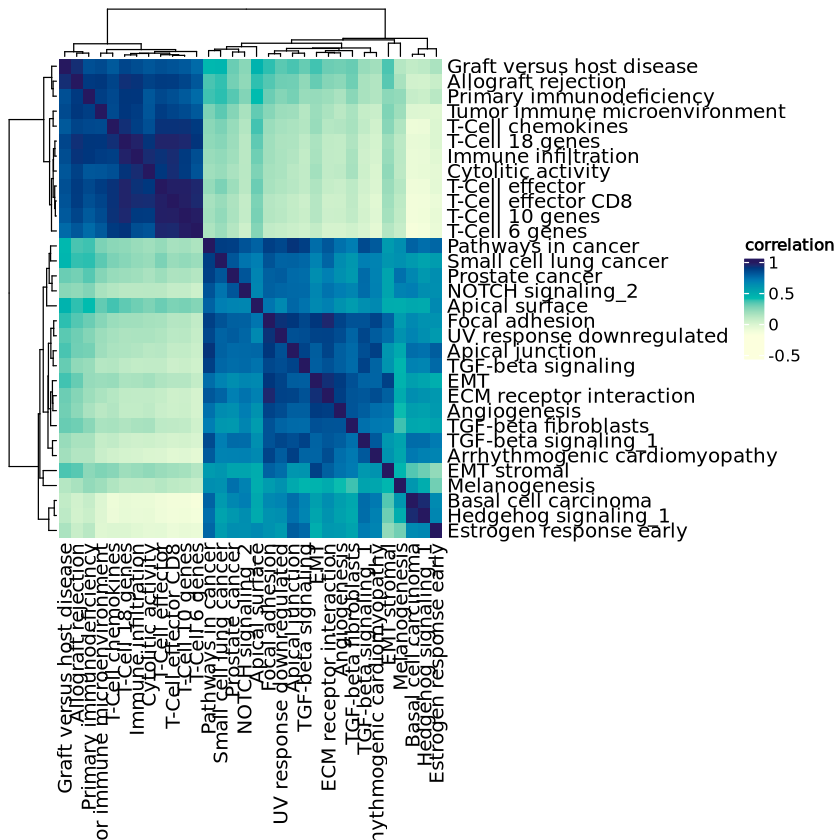

In [12]:
plot_3f = plot_signif_gene_heatmap(ingredients, model = "os", dataset = "all", covariates = "age_biopsy_purity_tissue")
plot_3f
pdf("../..//final_figures/3f_supplement_heatmap.pdf", width = 10, height = 10)
plot_3f
dev.off()

## supplementary figure: TFG-beta significant features: heatmap

png 
  2

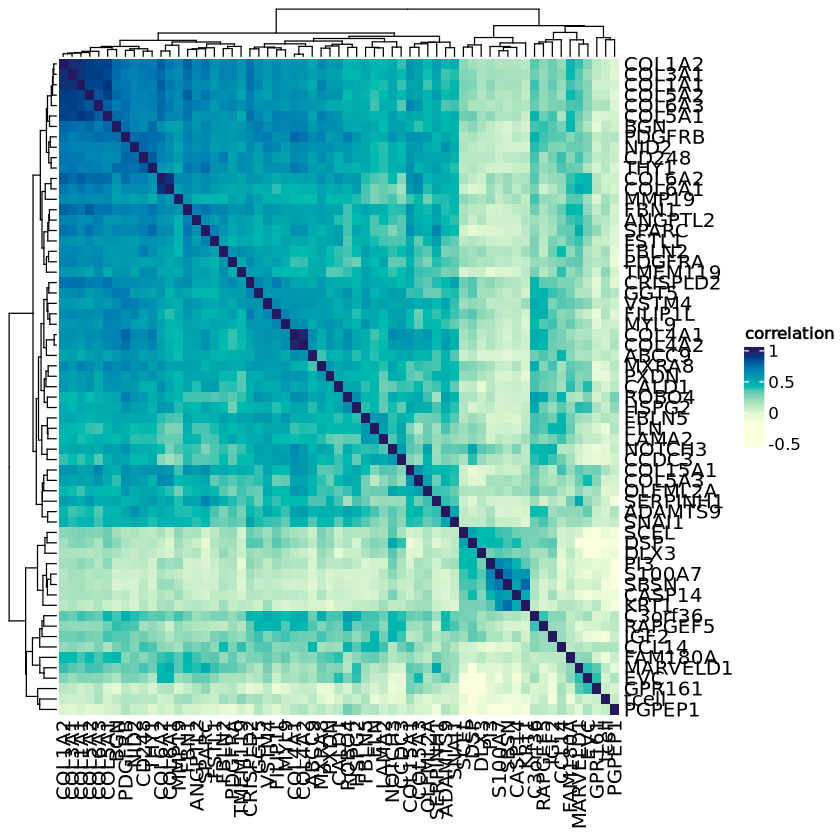

In [13]:
# additional supplementary figure: TGF-beta significant features

# filter for the T-cell genomic features: 
tcell_genes = data.table::fread("ref//features_Tcell.csv")[[1]]  %>% as.character()

# filter the ingredients for the desired test features
ingredients_os_notcell <- readRDS(paste0(TMP_DIR,"exhaustive-plots-base.Rds"))  %>% 
    filter(!grepl("gene_set", feature))  %>% 
    filter(!feature %in% tcell_genes)  %>% 
    filter(big_group =="RNA")  %>% 
    filter(!grepl("cibersort|tgfb", feature))  %>% 
    filter(model %in% "os" & dataset %in% "all" & covariates %in% "age_biopsy_purity_tissue")  %>% 
    filter(log10_p > threshold)  %>% 
    mutate(Short_name = gsub("isofox_", "", feature))


fig_3d = plot_signif_gene_heatmap(ingredients_os_notcell, model = "os", dataset = "all", covariates = "age_biopsy_purity_tissue")
fig_3d
pdf("../..//final_figures/3d_supplement_heatmap.pdf", width = 12, height = 12)
fig_3d
dev.off()